## Distribution of Returns

#### Main Problems
**Facts**
> In December 12, 2019, Robinhood introduced fractional share trading on its platform
- I don't know how many stocks each position holds, BUT i know that fractional investments are possible.
    - I can assume that the amount of money invested in each stock is normally distributed and i.i.d. for each stock
    - However, I will never know if someone has sold 99.9% of their position in a certain stock 
- The number of total active users incresed significantly after the early-2020 covid crash

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])



2025-04-03 23:36:24,693 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:28)
2025-04-03 23:36:24,895 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:40)


### Before COVID

In [4]:
an.return_params = {"horizons":{5, 15, 30, 60, 120}, "start_date":None, "end_date":"2020-02-03", "cumulative":True, "append_start":False}
#an.return_params = {"horizons":[1, 5, 15, 30, 60, 120], "start_date":None, "end_date":None, "cumulative":True, "append_start":False}
returns = an.build_returns()[0]
cols_to_keep = [col for col in returns.columns if col.endswith("return")]
returns = returns[cols_to_keep]
desc = returns.describe().T
desc["count"] = desc["count"].astype(int)
desc["positive returns"] = returns.gt(0).sum() / desc["count"]
#desc_bef.round(6)
desc


,count,mean,std,min,25%,50%,75%,max,positive returns
rh_portfolio_5_return,426,0.000259,0.026549,-0.105948,-0.013623,0.002922,0.014899,0.088194,0.570423
mc_5_return,426,0.002091,0.019395,-0.075729,-0.008188,0.004110,0.014121,0.063052,0.624413
VOO_5_return,426,0.002442,0.019790,-0.081061,-0.008308,0.004981,0.014449,0.067072,0.636150
VT_5_return,426,0.001031,0.018612,-0.066412,-0.010824,0.002804,0.013208,0.060003,0.565728
rh_portfolio_15_return,416,0.000089,0.041321,-0.196240,-0.017935,0.007992,0.025696,0.142238,0.615385
mc_15_return,416,0.006037,0.033270,-0.155506,-0.008605,0.011090,0.025396,0.111346,0.675481
VOO_15_return,416,0.007061,0.033404,-0.164321,-0.006906,0.014369,0.025994,0.109175,0.699519
VT_15_return,416,0.003120,0.031865,-0.131785,-0.011053,0.007954,0.022851,0.095121,0.634615
rh_portfolio_30_return,401,-0.002412,0.055168,-0.234788,-0.041433,0.009412,0.038000,0.155356,0.548628
mc_30_return,401,0.010918,0.045376,-0.170910,-0.015052,0.019726,0.039013,0.162319,0.663342


In [ ]:
import re

def extract_numbers(text):
    """Extracts all integers and floats from a string. Returns a list"""
    numbers = re.findall(r"[-+]?\d*\.?\d+", text)
    return [float(num) for num in numbers]


for idx in desc.index:
    res = extract_numbers(idx)
    print(res)

5
5
5
5
15
15
15
15
30
30
30
30
60
60
60
60
120
120
120
120
430
430
430
430


In [61]:
from scipy import stats

security = "VT"
days = 30
sample1 = returns[f"rh_portfolio_{days}_return"].dropna()
sample2 = returns[f"{security}_{days}_return"].dropna()

print(f"Values in sample1: {len(sample1)}, Values in sample2: {len(sample2)}\n")


t_stat, p_value = stats.ttest_ind(sample1, sample2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

Values in sample1: 401, Values in sample2: 401

t-statistic: -2.345757097067018
p-value: 0.01923179947738732


- Here i try to show the distribution for a window over time, to see how it progresses.

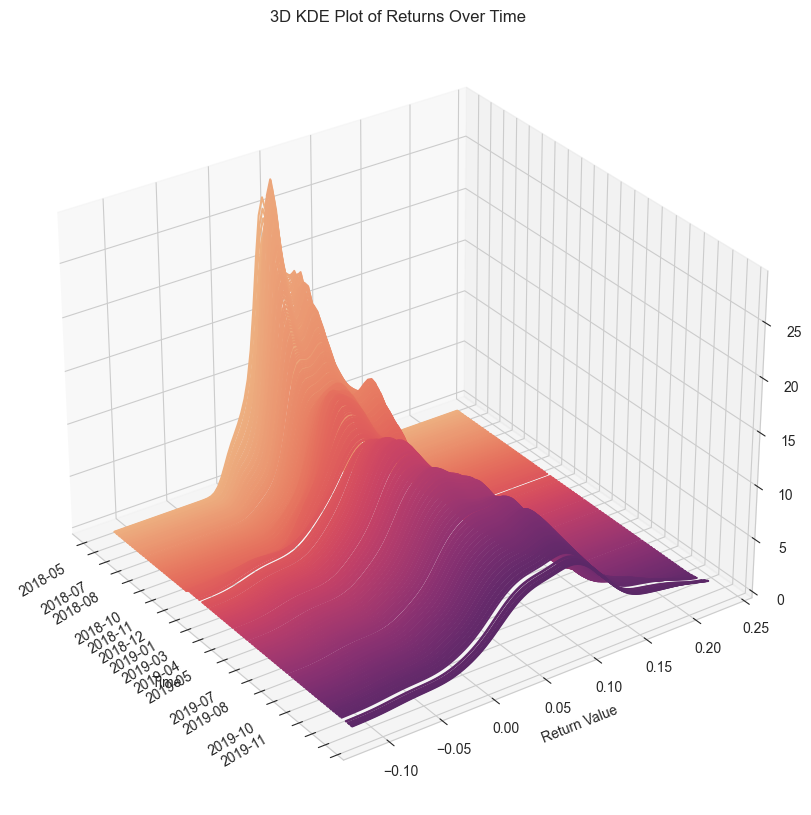

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


ret = an.build_returns()[0]["VOO_430_return"]

# Apply Seaborn styling
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

# Choose the color palette
colors = sns.color_palette("flare", n_colors=len(ret))

overall_min_return = ret.min()
overall_max_return = ret.max()
y_kde = np.linspace(overall_min_return, overall_max_return, 100)

# Iterate through each day and calculate the KDE
for i, d in enumerate(range(30, len(ret.index))):
    # Filter the series up to date d
    internal_ret = ret.head(d)

    # Calculate the KDE
    data_rolling = internal_ret.dropna()  # Handle potential NaNs
    kde = gaussian_kde(data_rolling)


    # Evaluate the KDE on the range of return values
    z_kde = kde(y_kde)

    # Get the time point for this KDE
    time_val_ordinal = internal_ret.index[-1].toordinal()

    # Create the 3D plot, swapping x and y
    ax.plot(np.repeat(time_val_ordinal, len(y_kde)), y_kde, z_kde, label=internal_ret.index[-1].strftime('%Y-%m'), color=colors[i], linewidth=1.5)

# Set labels
ax.set_xlabel("Time")
ax.set_ylabel("Return Value")
ax.set_zlabel("Density")
ax.set_title("3D KDE Plot of Returns Over Time")

# We need to explicitly set the x-axis ticks to be the ordinal values
# corresponding to your actual dates.
ordinal_dates = ret.index.map(pd.Timestamp.toordinal)
ax.set_xticks(ordinal_dates)
ax.set_xticklabels([date.strftime('%Y-%m') for date in ret.index])
ax.xaxis.set_major_locator(mdates.MonthLocator())   
fig.autofmt_xdate()

# Add legend (optional, might get crowded)
# ax.legend()

# Rotate the view for better visualization
#ax.view_init(elev=0, azim=270)
ax.view_init(elev=30, azim=-35)

# Show the plot
plt.show()

## Stochastic Dominance

### SSD

In [1]:
%load_ext autoreload
%autoreload 2

#### Looking at Different Timeframes

- Here I'm trying to understand from what point onwards the market becomes SSD

In [2]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO"])


2025-04-03 23:09:08,948 - src.analyzer - DEBUG - {5, 120, 60, 30, 15} (analyzer.py:30)
2025-04-03 23:09:09,812 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:41)


In [3]:
an.return_params = {"horizons":[1, 5, 30, 60, 120], "end_date":None, "cumulative":True, "append_start":False}
ret = an.build_returns()[0]
ret.describe()

,rh_portfolio,mc,VOO,rh_portfolio_1_return,mc_1_return,VOO_1_return,rh_portfolio_5_return,mc_5_return,VOO_5_return,rh_portfolio_30_return,...,VOO_30_return,rh_portfolio_60_return,mc_60_return,VOO_60_return,rh_portfolio_120_return,mc_120_return,VOO_120_return,rh_portfolio_564_return,mc_564_return,VOO_564_return
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,560.000000,560.000000,560.000000,535.000000,...,535.000000,505.000000,505.000000,505.000000,445.000000,445.000000,445.000000,564.000000,564.000000,564.000000
mean,0.000719,0.000396,0.000438,0.000719,0.000396,0.000438,0.003281,0.001913,0.002128,0.014274,...,0.009922,0.006089,0.013752,0.016860,-0.039285,0.007204,0.013850,-0.011075,0.071788,0.094275
std,0.018809,0.015470,0.015806,0.018809,0.015470,0.015806,0.041909,0.031198,0.031036,0.136886,...,0.079870,0.187087,0.104257,0.100071,0.115575,0.081338,0.079372,0.123340,0.069591,0.071760
min,-0.132368,-0.125496,-0.124870,-0.132368,-0.125496,-0.124870,-0.224427,-0.207508,-0.204425,-0.482722,...,-0.401950,-0.377518,-0.356261,-0.355392,-0.310504,-0.307022,-0.302877,-0.382891,-0.200798,-0.168586
25%,-0.006164,-0.003944,-0.003874,-0.006164,-0.003944,-0.003874,-0.012379,-0.008632,-0.009442,-0.043943,...,-0.015422,-0.075085,-0.029705,-0.021886,-0.121670,-0.042633,-0.036982,-0.055196,0.033823,0.051783
50%,0.001141,0.001012,0.000942,0.001141,0.001012,0.000942,0.004643,0.004961,0.005838,0.018669,...,0.027356,-0.005808,0.025478,0.030326,-0.036369,0.006536,0.011940,-0.014086,0.070623,0.090626
75%,0.009484,0.006481,0.006632,0.009484,0.006481,0.006632,0.022098,0.016300,0.016494,0.052278,...,0.047148,0.070771,0.069862,0.072825,0.012622,0.068389,0.073312,0.045442,0.106613,0.134336
max,0.072851,0.086673,0.091087,0.072851,0.086673,0.091087,0.153755,0.151511,0.162820,0.408751,...,0.252864,0.641470,0.338109,0.337947,0.370780,0.218409,0.231377,0.405724,0.224508,0.251507


In [4]:
cols_to_keep = [col for col in ret.columns if ("rh_portfolio_" in col or "VOO_" in col)]
voo_rh = ret[cols_to_keep]
voo_rh 

,rh_portfolio_1_return,VOO_1_return,rh_portfolio_5_return,VOO_5_return,rh_portfolio_30_return,VOO_30_return,rh_portfolio_60_return,VOO_60_return,rh_portfolio_120_return,VOO_120_return,rh_portfolio_564_return,VOO_564_return
date,,,,,,,,,,,,
2018-05-02,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-05-03,-0.002247,-0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002247,-0.002360
2018-05-04,0.014024,0.013179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011777,0.010819
2018-05-07,0.007955,0.003105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019732,0.013924
2018-05-08,-0.004306,-0.000041,0.015426,0.013883,NaN,NaN,NaN,NaN,NaN,NaN,0.015426,0.013883
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,-0.013430,0.000521,0.042994,0.023904,0.355362,0.079891,0.641470,0.172196,0.266849,-0.006712,0.362484,0.239991
2020-08-10,0.000239,0.003183,0.022503,0.020809,0.381376,0.106789,0.625174,0.163393,0.253757,-0.008333,0.362723,0.243175
2020-08-11,-0.016123,-0.008108,-0.007306,0.008504,0.344959,0.089377,0.595460,0.150789,0.247178,-0.012509,0.346600,0.235067


In [ ]:
from tqdm import tqdm
import pandas as pd

df_ssd = pd.DataFrame()
df_ssd.index = voo_rh.index


for h in [1, 5, 30, 60, 120, 564]:
    # Find the columns of returns for that speficic horizon
    h_cols = [col for col in voo_rh if f"_{h}_" in col]
    # Filter the dataframe
    h_df = voo_rh[h_cols]
    h_df = h_df.dropna() # Avoids empty arrays

    out_single_h = {}
    for day in tqdm(range(2, len(h_df)+1)): # Doesnt make sense to compare when you have just 1 point
        # Take the first #day 
        one_day = h_df.head(day)
        # Perform test and store percentage of points
        pct = an.test_second_order_stochastic_dominance(col_a=f"VOO_{h}_return", col_b=f"rh_portfolio_{h}_return", df=one_day)[4]
        out_single_h[one_day.index[-1]] = pct

    # Rename to have a column with that name and merge on index (date)
    out_single_h_series = pd.Series(out_single_h, name=f"SSD_{h}")
    df_ssd = df_ssd.merge(out_single_h_series, how="left", left_index=True, right_index=True)


100%|██████████| 563/563 [00:00<00:00, 2961.12it/s]


,SSD_1,SSD_5,SSD_30,SSD_60,SSD_120,SSD_564
date,,,,,,
2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-03,0.000000,NaN,NaN,NaN,NaN,0.0
2018-05-04,0.000000,NaN,NaN,NaN,NaN,0.0
2018-05-07,0.000000,NaN,NaN,NaN,NaN,0.0
2018-05-08,100.000000,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2020-08-07,95.523724,96.133094,97.740113,100.0,100.0,100.0
2020-08-10,95.621090,96.140036,97.556391,100.0,100.0,100.0
2020-08-11,95.807315,96.146953,97.467167,100.0,100.0,100.0


<Axes: xlabel='date'>

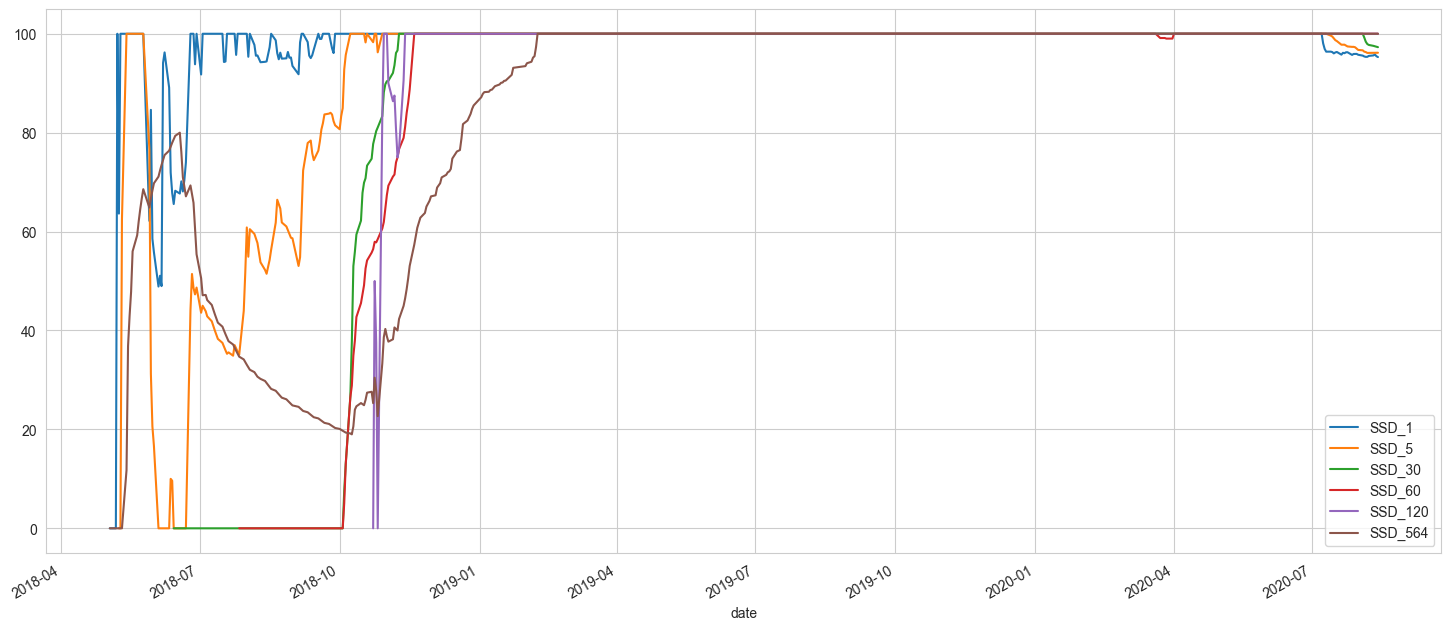

In [99]:
df_ssd.plot(kind="line", figsize=(18, 8))

- Here I plot SSD test at the last day of the dataset 

2025-04-03 23:11:40,745 - src.analyzer - DEBUG - [1, 5, 15, 30, 60, 120] (analyzer.py:30)
2025-04-03 23:11:40,745 - src.analyzer - DEBUG - [1, 5, 15, 30, 60, 120] (analyzer.py:30)
2025-04-03 23:11:41,332 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:41)
2025-04-03 23:11:41,332 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:41)


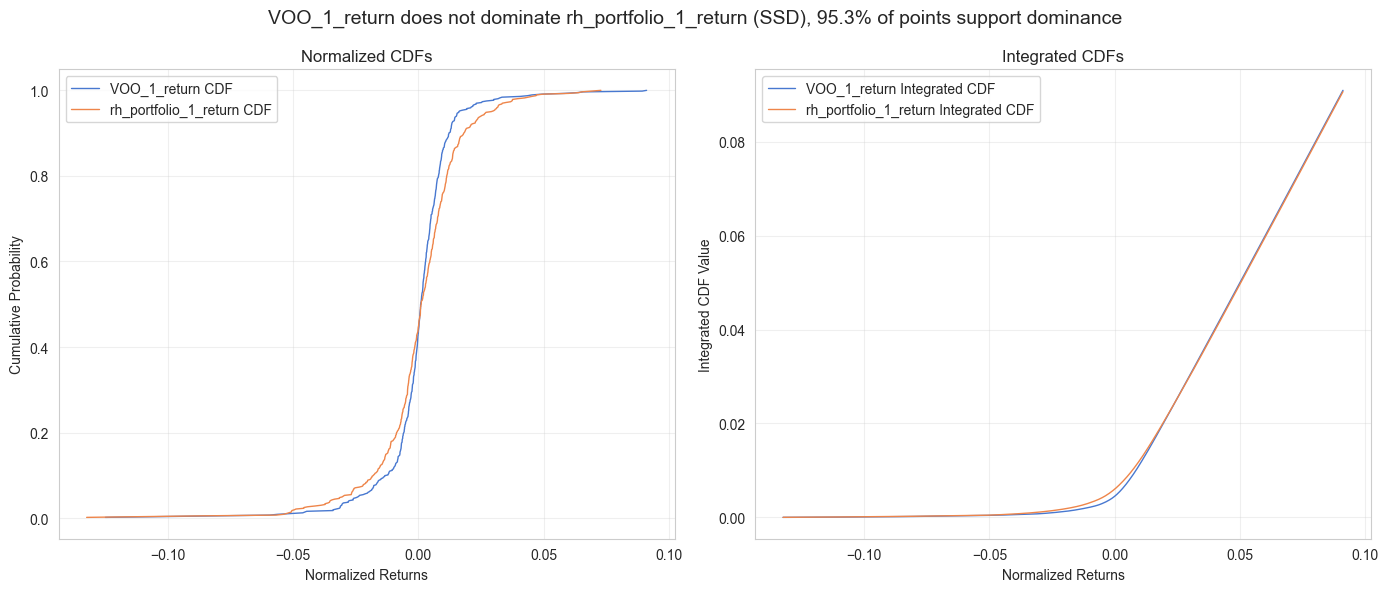

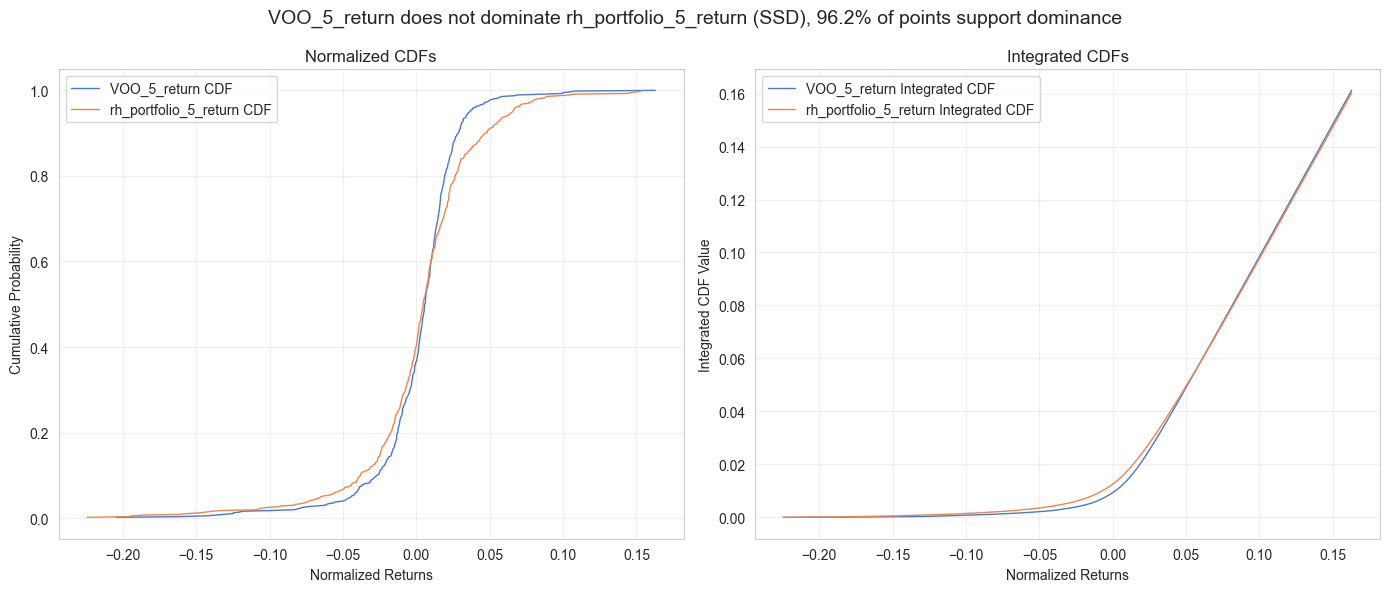

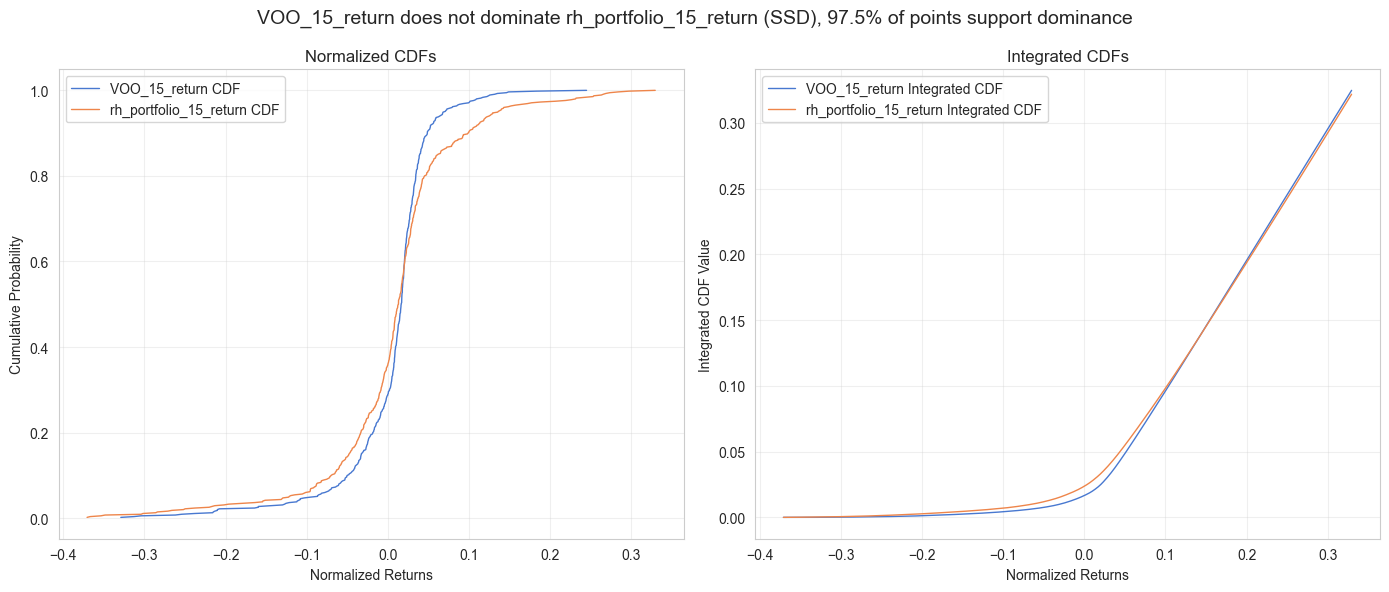

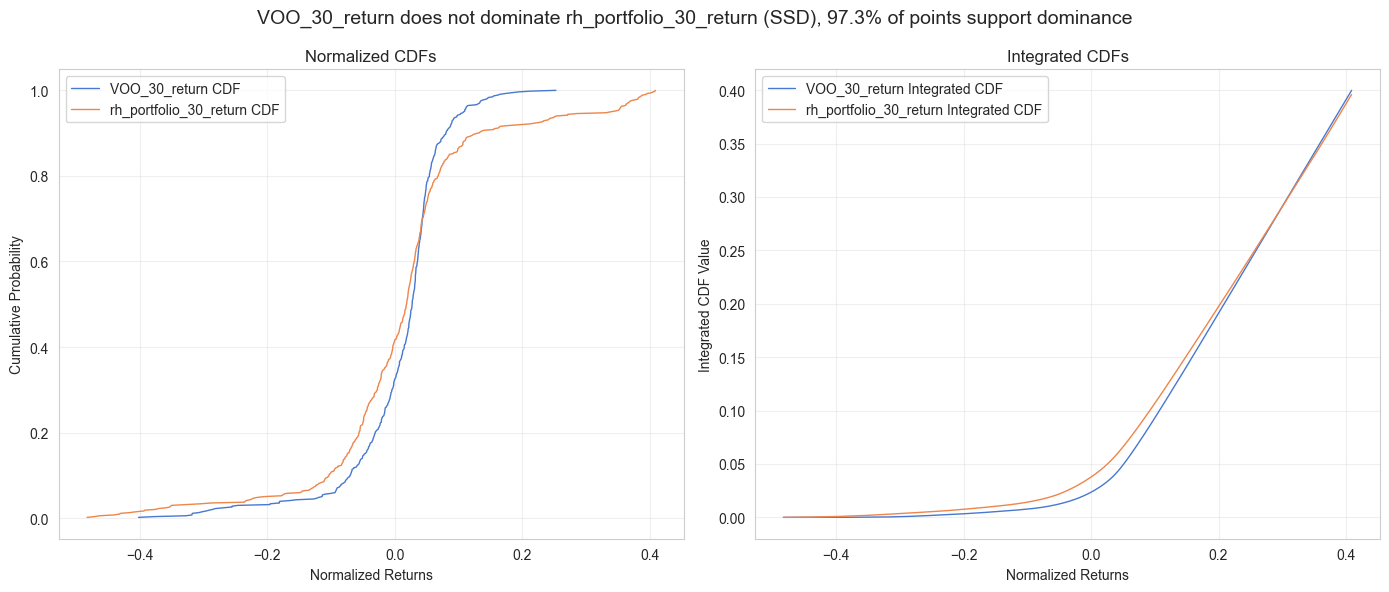

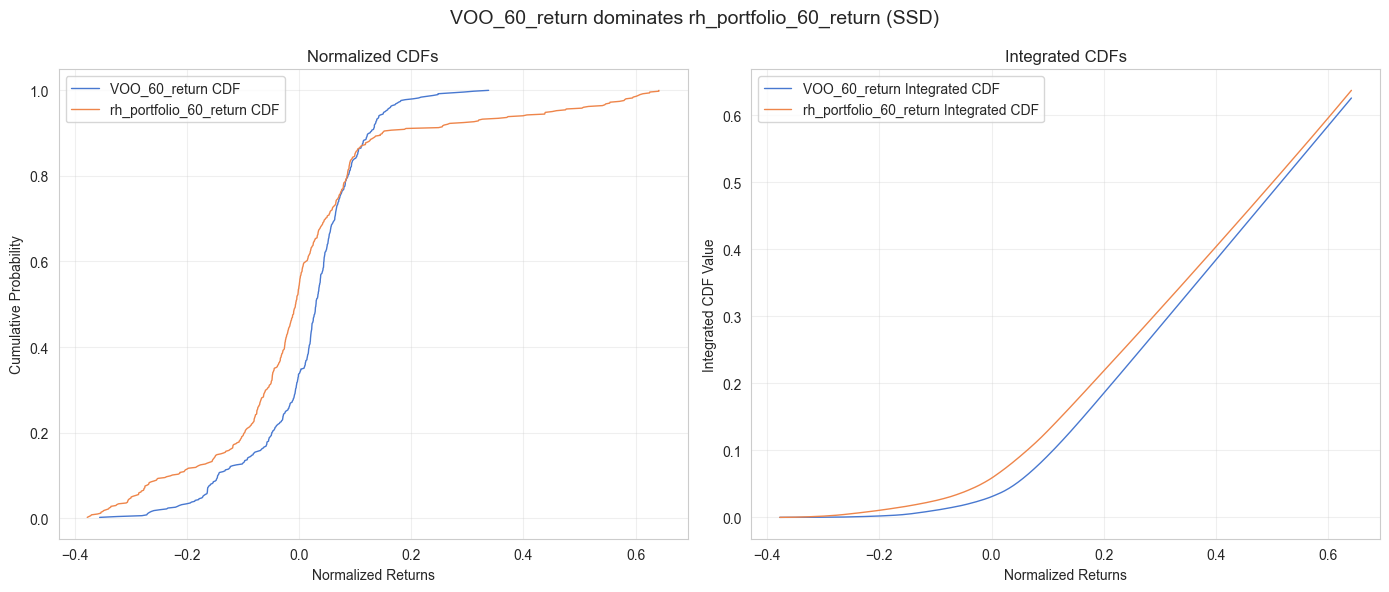

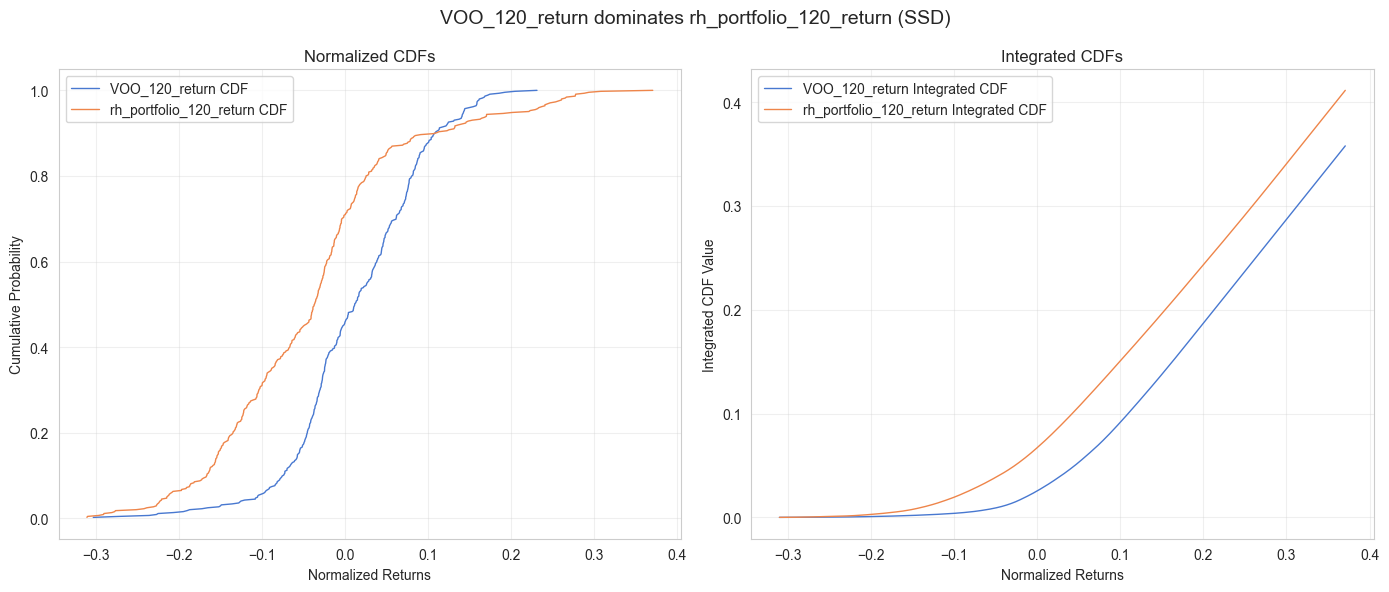

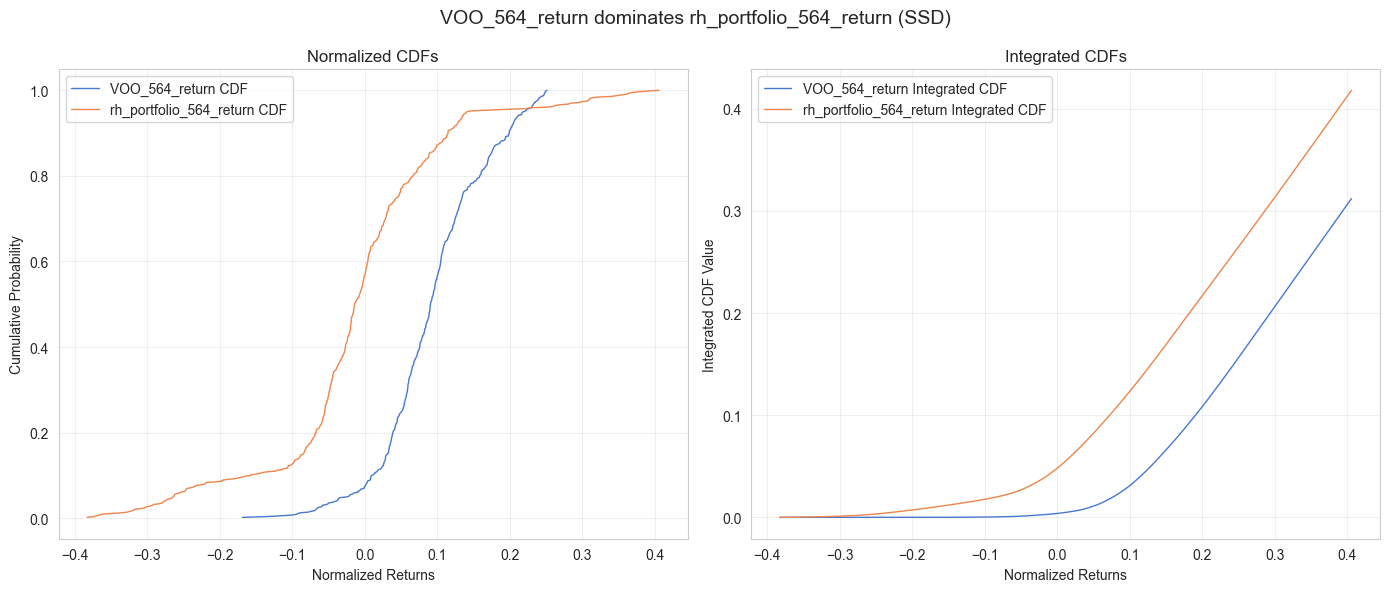

In [7]:
from src import Analyzer

return_params = {"horizons":[1, 5, 15, 30, 60, 120], "start_date":None, "end_date":None, "cumulative":True, "append_start":False}
an = Analyzer(return_params=return_params)



for hor in [1, 5, 15, 30, 60, 120, 564]:
    an.plot_ssd_comparison(col_a=f"VOO_{hor}_return", col_b=f"rh_portfolio_{hor}_return")

- here I try to estimate risk aversion for different timeframes using CRRA
\begin{equation}
    U(W) = 
    \begin{cases}
    \frac{W^{1-\gamma}-1}{1-\gamma}, \gamma\neq 1\\
    \ln(W), \gamma = 1
    \end{cases}
\end{equation}

**Main Problem**: How should i compute the variance?

In [9]:
import pandas as pd

tb = pd.read_csv("../data/fvx.csv", index_col=0, header=1).dropna()
tb.index = pd.to_datetime(tb.index)
tb.index = tb.index.rename("date")
tb = tb/100

tb

,^FVX
date,
2018-05-02,0.02802
2018-05-03,0.02782
2018-05-04,0.02780
2018-05-07,0.02784
2018-05-08,0.02808
...,...
2020-08-06,0.00214
2020-08-07,0.00229
2020-08-10,0.00234


In [10]:
voo_rh.merge(tb, how="left", left_index=True, right_index=True)

NameError: name 'voo_rh' is not defined

In [11]:
def compute_crra_gamma(mean:float, risk_free:float, var:float):
    """
    Given the inputs it estimates the gamma of a CRRA utility function

    Returns:
    - gamma : float
    """

    gamma = (mean - risk_free)/var + 1/2
    return gamma

In [12]:
out = {}
for d in range(150, (len(voo_rh))):
    window = voo_rh.head(d)
    gamma = compute_crra_gamma(window["rh_portfolio_5_return"].mean(), 0, window["rh_portfolio_5_return"].var())

    out[window.index[-1]] = gamma
out = pd.Series(out)
out.plot(kind="line", figsize=(18, 8))

NameError: name 'voo_rh' is not defined

In [201]:
out.describe(percentiles=(0.1,0.9))

count    414.000000
mean      -0.220654
std        1.040793
min       -3.450792
10%       -1.327851
50%       -0.263903
90%        1.119843
max        2.338959
dtype: float64

### All Possible Windows 

In [100]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])

In [103]:
df_merged = an.df_merged


In [114]:
levels_rh = an._build_levels()
levels_rh.index = pd.to_datetime(levels_rh.index)
levels_rh

,rh_portfolio,mc,VOO,VT
date,,,,
2018-05-02,96.041674,3.254156e+13,241.78000,73.62
2018-05-03,95.826112,3.247897e+13,241.21001,73.59
2018-05-04,97.179437,3.288194e+13,244.41000,74.22
2018-05-07,97.955565,3.301587e+13,245.17000,74.33
2018-05-08,97.534681,3.303305e+13,245.16000,74.34
...,...,...,...,...
2020-08-07,138.001671,4.041761e+13,307.35999,80.69
2020-08-10,138.034713,4.049861e+13,308.34000,80.91
2020-08-11,135.827047,4.018188e+13,305.85001,80.66


In [115]:
# Set doesnt allow to duplicate items
all_windows = set()

# get dates to iterate on
df_merged["date"] = pd.to_datetime(df_merged["date"])
dates = df_merged["date"].unique()


for date1 in dates:
    for date2 in dates:
        # Order the dates so that i dont have problems in computing reteurns and i dont have tuples with the same value in different order 
        if date2>date1:
            inner_tuple = (date1, date2)
            all_windows.add(inner_tuple)


all_windows = list(all_windows)


In [116]:
from tqdm import tqdm
import pandas as pd
import numpy as np

all_ret = []
for window in tqdm(all_windows):

    # get first and last value (days)
    beg = window[0]
    end = window[1]
    
    # Compute days between them
    time = end - beg
    days = time.days

    # compute log returns
    ret = np.log(levels_rh.loc[end]/levels_rh.loc[beg])

    all_ret.append(ret)

# Create DataFrame from the list of Series
all_ret_df = pd.DataFrame(all_ret)

# Assign MultiIndex with start and end dates
all_ret_df.index = pd.MultiIndex.from_tuples(all_windows, names=["start_date", "end_date"])

all_ret_df['date_difference'] = all_ret_df.index.map(lambda x: (x[1] - x[0]).days)



100%|██████████| 158766/158766 [00:32<00:00, 4879.41it/s]


In [117]:
all_ret_df.sort_values("date_difference", ascending=False)

rh_portfolio        mc       VOO        VT  \
start_date end_date                                                 
2018-05-02 2020-08-13      0.405724  0.223439  0.246962  0.103525   
           2020-08-12      0.388957  0.224508  0.248673  0.106216   
2018-05-03 2020-08-13      0.407971  0.225364  0.249322  0.103933   
2018-05-04 2020-08-13      0.393947  0.213033  0.236143  0.095408   
2018-05-03 2020-08-12      0.391204  0.226433  0.251033  0.106623   
...                             ...       ...       ...       ...   
2020-02-20 2020-02-21     -0.018841 -0.010397 -0.010419 -0.008149   
2019-08-01 2019-08-02     -0.014185 -0.008285 -0.007339 -0.009297   
2020-01-27 2020-01-28      0.013363  0.009852  0.010775  0.009778   
2018-10-10 2018-10-11     -0.017314 -0.018387 -0.021273 -0.017657   
2019-08-20 2019-08-21      0.007548  0.007921  0.008075  0.008339   

                       date_difference  
start_date end_date                     
2018-05-02 2020-08-13              834  
           2020-08-12              833  
2018-05-03 2020-08-13              833  
2018-05-04 2020-08-13              832  
2018-05-03 2020-08-12              832  
...                                ...  
2020-02-20 2020-02-21                1  
2019-08-01 2019-08-02                1  
2020-01-27 2020-01-28                1  
2018-10-10 2018-10-11                1  
2019-08-20 2019-08-21                1  

[158766 rows x 5 columns]

In [118]:
all_ret_df.describe()

,rh_portfolio,mc,VOO,VT,date_difference
count,158766.000000,158766.000000,158766.000000,158766.000000,158766.000000
mean,-0.038220,0.036584,0.046383,0.006374,280.551478
std,0.170191,0.091365,0.090265,0.089854,197.901511
min,-0.523693,-0.421439,-0.420093,-0.423053,1.000000
25%,-0.131350,-0.008024,0.000342,-0.035421,113.000000
50%,-0.044684,0.038461,0.047513,0.012883,247.000000
75%,0.028125,0.093378,0.102958,0.062251,419.000000
max,0.788615,0.425306,0.417259,0.407299,834.000000


In [120]:
all_ret_df = all_ret_df.drop(columns="date_difference")
# Compute quantiles
lower = all_ret_df.quantile(0.005)
upper = all_ret_df.quantile(0.995)

# Filter out rows where any column is outside the 1st–99th percentile range
all_ret_df_clean = all_ret_df[
    ~((all_ret_df < lower) | (all_ret_df > upper)).any(axis=1)
]


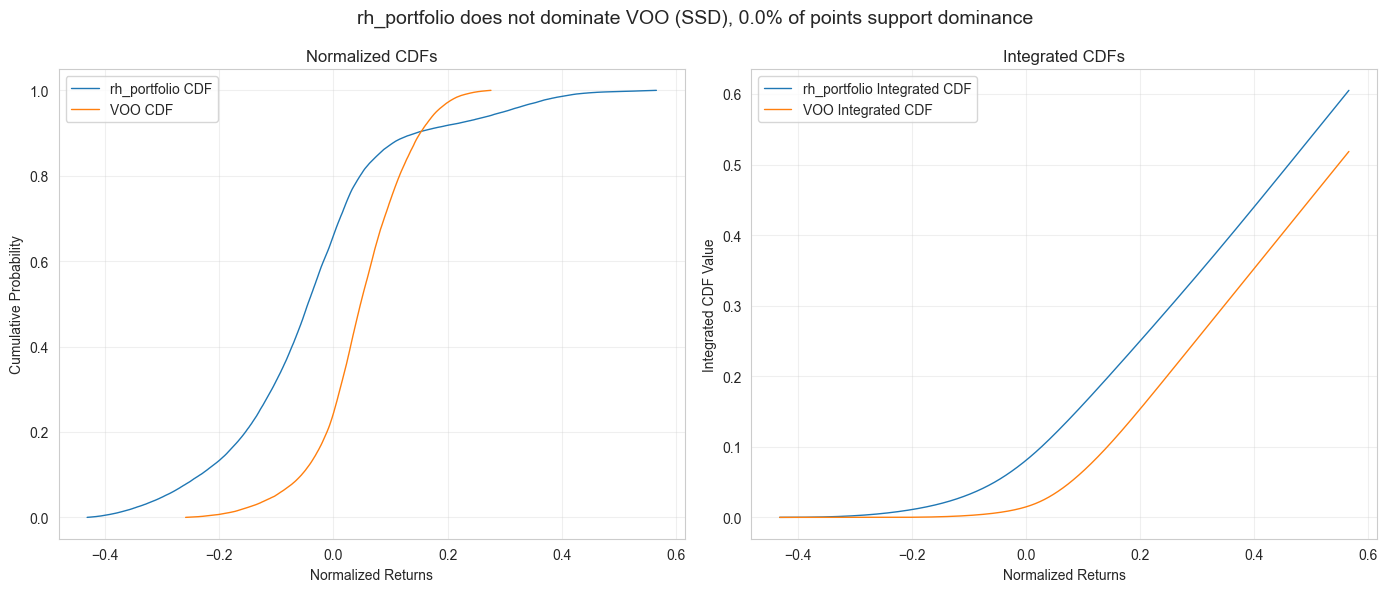

np.False_

In [128]:
an.plot_ssd_comparison("rh_portfolio", "VOO", all_ret_df_clean)

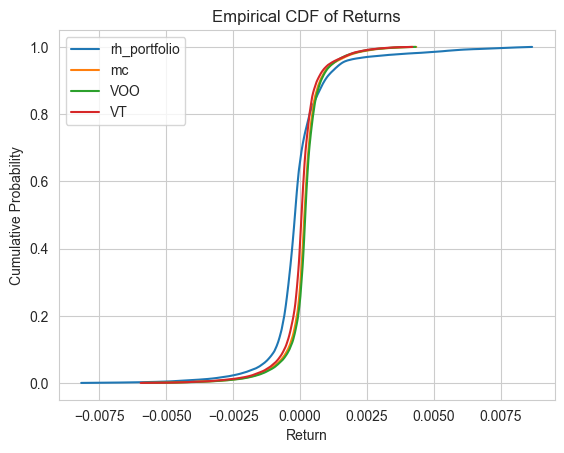

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Plot for each column
for col in all_ret_df_clean.columns:
    data = np.sort(all_ret_df_clean[col])
    cdf = np.arange(1, len(data) + 1) / len(data)
    plt.plot(data, cdf, label=col)

plt.title("Empirical CDF of Returns")
plt.xlabel("Return")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


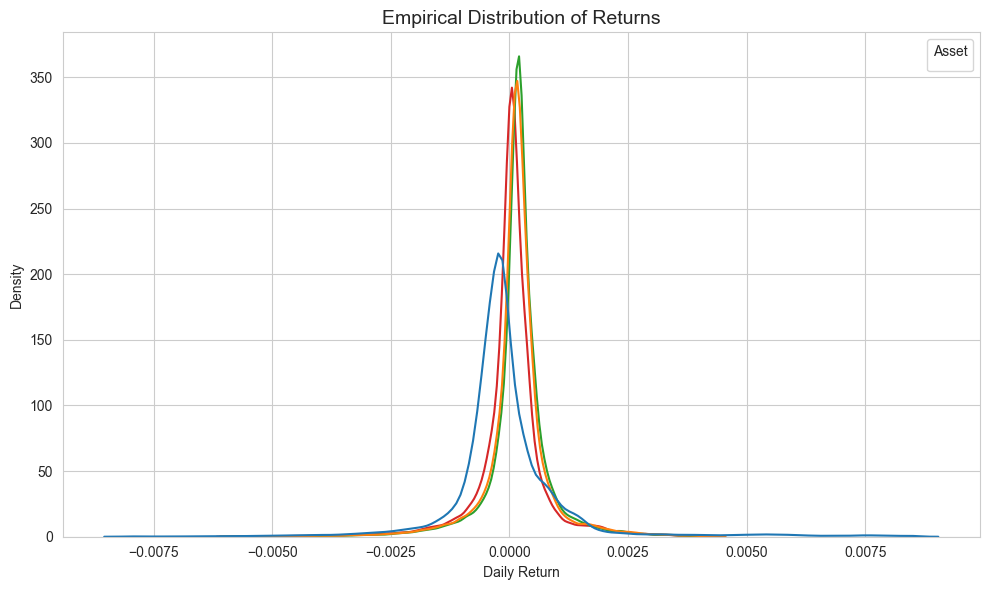

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: reset index in case it's datetime or multiindex
df_merged = all_ret_df_clean.reset_index(drop=True)

# Reshape your DataFrame to long format
df_long = df_merged.melt(var_name='asset', value_name='Return')

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_long, x='Return', hue="asset")

# Styling
plt.title("Empirical Distribution of Returns", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Asset")

plt.show()


In [ ]:
voo_rh = levels_rh / levels_rh.iloc[0]*100
voo_rh 

,rh_portfolio,mc,VOO,VT
date,,,,
2018-05-02,100.000000,100.000000,100.000000,100.000000
2018-05-03,99.775554,99.807671,99.764253,99.959250
2018-05-04,101.184656,101.046006,101.087766,100.814996
2018-05-07,101.992771,101.457563,101.402101,100.964412
2018-05-08,101.554541,101.510360,101.397965,100.977995
...,...,...,...,...
2020-08-07,143.689365,124.203051,127.123827,109.603369
2020-08-10,143.723769,124.451980,127.529159,109.902200
2020-08-11,141.425115,123.478678,126.499301,109.562619


<Axes: ylabel='Density'>

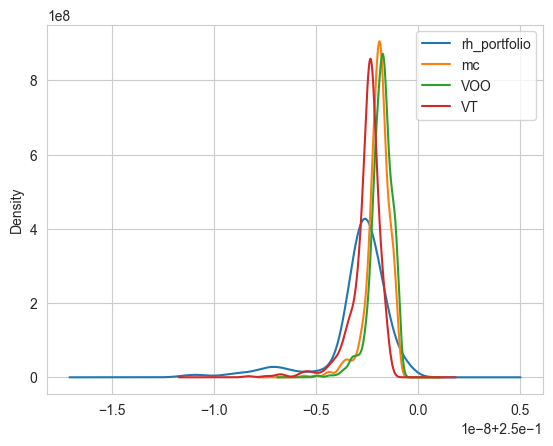

In [ ]:
def crra(col, gamma):
    utility = (col**(1-gamma)-1)/(1-gamma)
    return utility

#gamma_value = 2
#levels_rh.apply(lambda x: crra(x, gamma=gamma_value))
utility = crra(voo_rh, gamma=5)
utility = utility.replace([np.inf, -np.inf], np.nan)
utility = utility.dropna(axis=0)

utility.plot(kind="kde")


### Trading Frequency

In [ ]:
from src.DataLoader import DataLoader
import numpy as np

dl = DataLoader(handle_nans="drop")

df_merged = dl.merge_dfs()

df_merged

Loading Robinhood data
Loading CRSP data
Merging...


,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff
0,2018-05-02,A,590.000000,11.0,2240482.0,65.91,322477000.0,0.000000,0.000000,2.125446e+10,38886.900000,NaN,NaN,5.199292e+06,0.000113,0.000653,0.000078,NaN,NaN
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,38906.664211,-0.005977,-3.526316,5.207544e+06,0.000113,0.000659,0.000078,0.001587,8251.771750
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,39359.708333,0.001679,0.984649,5.204840e+06,0.000113,0.000657,0.000078,-0.000519,-2703.986424
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,39483.801000,-0.002653,-1.558333,5.194440e+06,0.000113,0.000658,0.000078,-0.001998,-10400.130796
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,38880.911250,-0.014977,-8.775000,5.200559e+06,0.000111,0.000658,0.000077,0.001178,6119.008349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874703,2020-08-07,ZYNE,32151.291667,11.0,542213.0,4.22,29255000.0,-0.018780,-0.897151,1.234561e+08,135678.450833,-0.002449,-78.916667,3.239298e+07,0.000993,0.000003,0.000030,0.001664,53808.041667
2874704,2020-08-10,ZYNE,32060.833333,11.0,584599.0,4.24,29255000.0,0.004728,-0.892423,1.240412e+08,135937.933333,-0.002814,-90.458333,3.245664e+07,0.000988,0.000003,0.000030,0.001965,63660.625000
2874705,2020-08-11,ZYNE,31939.875000,11.0,449620.0,4.07,29255000.0,-0.040920,-0.933344,1.190679e+08,129995.291250,-0.003773,-120.958333,3.249282e+07,0.000983,0.000003,0.000029,0.001115,36178.458333
2874706,2020-08-12,ZYNE,31851.578947,11.0,980844.0,3.96,29255000.0,-0.027399,-0.960742,1.158498e+08,126132.252632,-0.002764,-88.296053,3.247689e+07,0.000981,0.000003,0.000027,-0.000490,-15922.644737


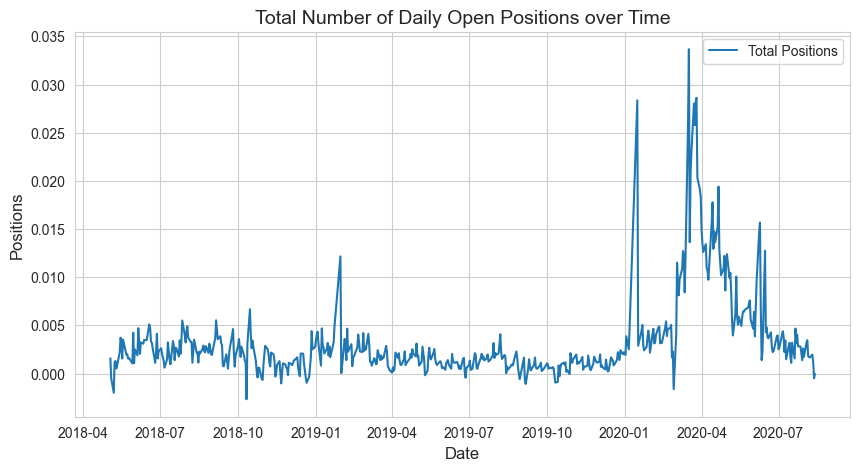

In [ ]:
df_plot = df_merged[["date", "total_holders"]].groupby("date").mean().pct_change()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))  # Set figure size
sns.lineplot(x=df_plot.index, y=df_plot["total_holders"], label="Total Positions")

# Formatting
plt.xlabel('Date', fontsize=12)
plt.ylabel('Positions', fontsize=12)
plt.title('Total Number of Daily Open Positions over Time', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.show()

**Hint:** Only existing investors can sell shares!

<Axes: xlabel='date'>

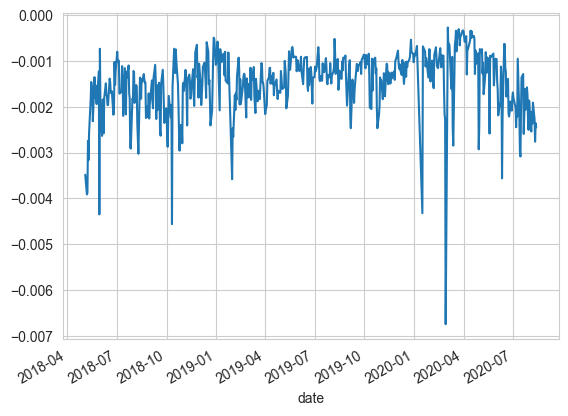

In [ ]:
df_sold = df_merged[df_merged["holders_change_pct"]<0]


df_sold = df_sold[["holders_change_diff", "total_holders", "date"]].groupby("date").agg({
    "holders_change_diff":"sum",
    "total_holders":"mean"
})
df_sold["activity"] = df_sold["holders_change_diff"] / df_sold["total_holders"].shift(1)
df_sold.dropna(inplace=True)
df_sold["activity"].plot()

In [ ]:
df_merged["retail_activity"] = df_merged["holders_change_diff"].abs() / df_merged["vol"]

df_merged = df_merged.replace([np.inf, -np.inf], np.nan)
df_merged = df_merged.dropna(subset="retail_activity")



df_merged["retail_activity"].describe()

count    2.854047e+06
mean     2.664588e-04
std      1.093830e-02
min      0.000000e+00
25%      7.454951e-07
50%      4.582094e-06
75%      1.986528e-05
max      5.814171e+00
Name: retail_activity, dtype: float64

In [ ]:
df_merged.sort_values("retail_activity", ascending=False)

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,retail_activity
458386,2020-01-16,CIG,4044.588235,31.0,352.0,4.014863,5.642100e+07,0.082238,0.729692,226522560.0,16238.466031,1.024318,2046.588235,1.088966e+07,0.000371,5.691291e-06,1.512684e-05,0.028363,300347.865419,5.814171
661904,2019-09-04,DISCB,130.208333,11.0,1.0,31.925000,6.512000e+06,-0.029475,-0.033118,207895600.0,4156.901042,-0.027994,-3.750000,9.756450e+06,0.000013,5.880342e-06,4.709323e-06,0.001656,16133.916667,3.750000
661753,2019-01-23,DISCB,51.583333,11.0,1.0,32.375000,7.000000e+06,-0.074384,-0.019121,226625000.0,1670.010417,-0.056402,-3.083333,7.654998e+06,0.000007,7.072446e-06,2.383394e-06,0.004929,37548.250000,3.083333
1866537,2019-05-23,NSYS,128.750000,11.0,1.0,4.145000,2.685000e+06,0.003625,0.232536,11129325.0,533.668750,-0.022770,-3.000000,8.937193e+06,0.000014,3.271169e-07,6.512848e-07,0.001120,10001.020833,3.000000
312224,2019-09-04,BOSS,110.375000,73.0,1.0,19.145800,2.000000e+05,0.009820,0.048466,3829160.0,2113.217675,0.024362,2.625000,9.756450e+06,0.000011,1.083081e-07,2.394049e-06,0.001656,16133.916667,2.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385481,2019-08-23,SONA,34.000000,11.0,41068.0,14.280000,2.414400e+07,-0.038466,-0.140857,344776320.0,485.520000,0.000000,0.000000,9.690839e+06,0.000004,1.004332e-05,5.672837e-07,0.001317,12742.520833,0.000000
2385482,2019-08-26,SONA,34.000000,11.0,28640.0,14.610000,2.414400e+07,0.022846,-0.118011,352743840.0,496.740000,0.000000,0.000000,9.713055e+06,0.000004,1.017486e-05,5.712347e-07,0.002292,22215.291667,0.000000
2385483,2019-08-27,SONA,34.000000,11.0,65511.0,14.510000,2.414400e+07,-0.006868,-0.124879,350329440.0,493.340000,0.000000,0.000000,9.729024e+06,0.000003,1.014061e-05,5.688122e-07,0.001644,15969.083333,0.000000
2385484,2019-08-28,SONA,34.000000,11.0,37835.0,14.430000,2.414400e+07,-0.005529,-0.130408,348397920.0,490.620000,0.000000,0.000000,9.734842e+06,0.000003,1.002302e-05,5.637453e-07,0.000598,5818.354167,0.000000


In [ ]:
# Compute quantiles
lower = df_merged["retail_activity"].quantile(0.005)
upper = df_merged["retail_activity"].quantile(0.995)

# Filter out rows where any column is outside the 1st–99th percentile range
df_clean = df_merged[
    ~((df_merged["retail_activity"] < lower) | (df_merged["retail_activity"] > upper))
]

df_clean.describe()

,date,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,retail_activity
count,2839776,2.839776e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.838239e+06,2.839776e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.839776e+06,2.839776e+06,2.839776e+06
mean,2019-06-23 15:20:55.180690688,2.307729e+03,2.975666e+01,1.213016e+06,4.611339e+01,1.222692e+08,-2.618138e-04,-9.553646e-02,6.949674e+09,2.222260e+05,3.061624e-03,9.568509e+00,1.165451e+07,1.981123e-04,1.982674e-04,1.982652e-04,3.270988e-03,4.849524e+04,3.898509e-05
min,2018-05-03 00:00:00,0.000000e+00,1.100000e+01,1.000000e+00,8.750000e-02,2.500000e+04,-2.014903e+00,-5.015219e+00,4.933913e+05,0.000000e+00,-1.000000e+00,-4.684154e+04,5.194440e+06,0.000000e+00,1.360678e-08,0.000000e+00,-2.668335e-03,-1.977479e+04,0.000000e+00
25%,2018-11-23 00:00:00,5.900000e+01,1.100000e+01,3.766400e+04,1.169000e+01,1.215000e+07,-9.730098e-03,-2.019256e-01,1.620897e+08,1.093557e+03,-3.201616e-03,-8.260870e-01,7.140476e+06,6.046472e-06,4.653241e-06,1.150658e-06,1.047523e-03,8.414583e+03,7.348000e-07
50%,2019-06-24 00:00:00,2.130000e+02,1.100000e+01,2.000850e+05,2.546586e+01,3.550800e+07,1.926558e-04,-1.483951e-02,6.742564e+08,4.081255e+03,0.000000e+00,0.000000e+00,9.127982e+06,2.165889e-05,1.930053e-05,4.385810e-06,1.986673e-03,1.613392e+04,4.517613e-06
75%,2020-01-24 00:00:00,8.038883e+02,7.100000e+01,7.980742e+05,5.199000e+01,9.449700e+07,9.839371e-03,9.548861e-02,3.100733e+09,1.918826e+04,5.074450e-03,1.276316e+00,1.108365e+07,7.852648e-05,8.877910e-05,1.996990e-05,3.467617e-03,3.553504e+04,1.935937e-05
max,2020-08-13 00:00:00,9.439573e+05,7.500000e+01,1.003256e+09,4.699000e+03,1.013935e+10,2.277106e+00,3.494768e+00,1.966963e+12,1.352021e+09,2.685833e+01,5.990375e+04,3.249282e+07,3.633906e-02,4.834144e-02,3.040521e-01,3.366375e-02,4.644862e+05,2.529975e-03
std,NaN,1.634189e+04,2.649601e+01,4.836340e+06,1.006762e+02,3.958238e+08,3.510384e-02,4.435457e-01,3.521232e+10,6.106850e+06,4.291371e-02,2.298934e+02,7.395255e+06,1.213005e-03,9.972127e-04,3.901845e-03,4.508054e-03,8.353160e+04,1.474125e-04


<Axes: ylabel='Density'>

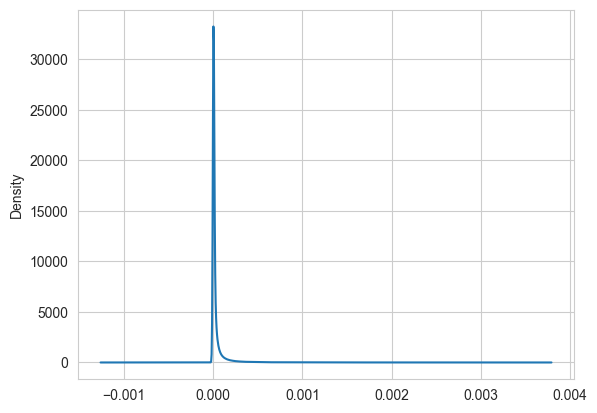

In [38]:

df_clean["retail_activity"].plot(kind="kde")

# Other